In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

data = pd.read_csv("customer_acquisition_cost_dataset.csv")
print(data.head())

  Customer_ID Marketing_Channel  Marketing_Spend  New_Customers
0    CUST0001   Email Marketing      3489.027844             16
1    CUST0002        Online Ads      1107.865808             33
2    CUST0003      Social Media      2576.081025             44
3    CUST0004        Online Ads      3257.567932             32
4    CUST0005   Email Marketing      1108.408185             13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [5]:
data['CAC'] = data['Marketing_Spend'] / data['New_Customers']

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Marketing_Channel     500 non-null    object 
 2   Marketing_Spend       500 non-null    float64
 3   New_Customers         500 non-null    int64  
 4   CAC                   500 non-null    float64
 5   Conversion_Rate       500 non-null    float64
 6   Break_Even_Customers  500 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


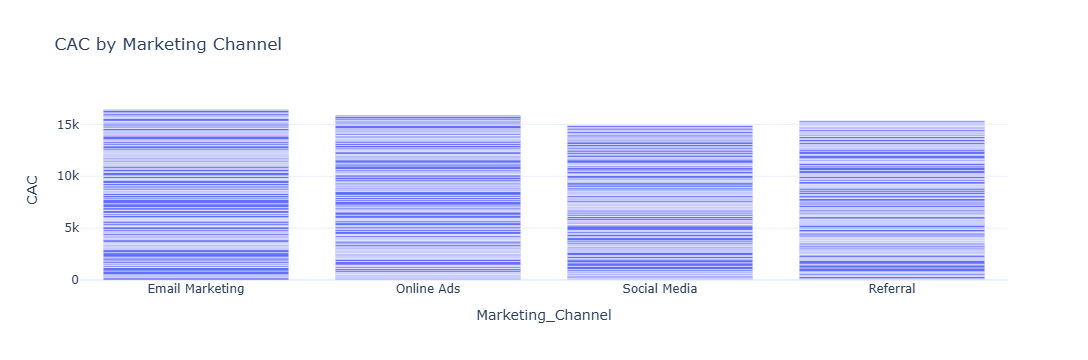

In [23]:
fig1 = px.bar(data, x='Marketing_Channel', y='CAC', title='CAC by Marketing Channel')
fig1.show()

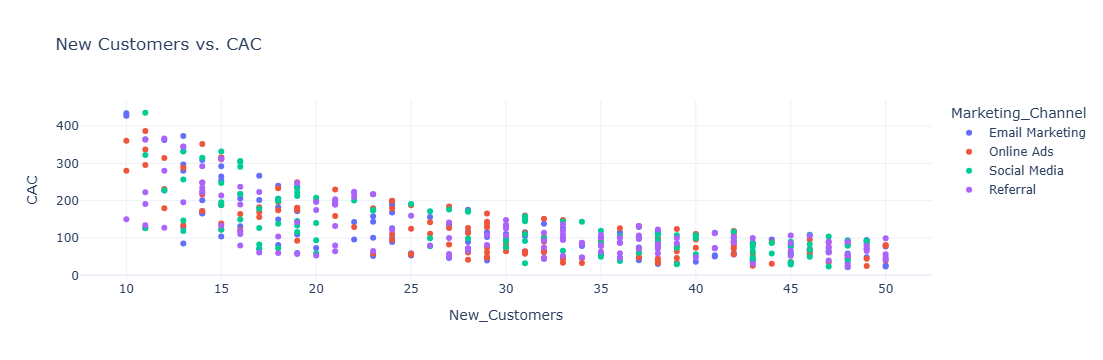

In [41]:
fig2 = px.scatter(data, x='New_Customers', y='CAC', color='Marketing_Channel', title='New Customers vs. CAC')
fig2.show()

# ADD TRENDLINE INTO IT


In [42]:
summary_stats = data.groupby('Marketing_Channel')['CAC'].describe()
print(summary_stats)

                   count        mean        std        min        25%  \
Marketing_Channel                                                       
Email Marketing    124.0  132.913758  89.597107  23.491784  68.226195   
Online Ads         130.0  122.135938  79.543793  24.784414  62.207753   
Referral           128.0  119.892174  74.101916  22.012364  71.347939   
Social Media       118.0  126.181913  77.498788  21.616453  75.633389   

                          50%         75%         max  
Marketing_Channel                                      
Email Marketing    106.940622  177.441898  434.383446  
Online Ads          97.736027  163.469540  386.751285  
Referral            99.835688  137.577935  366.525209  
Social Media       102.620356  167.354709  435.487346  


In [12]:
data['Conversion_Rate'] = data['New_Customers'] / data['Marketing_Spend'] * 100

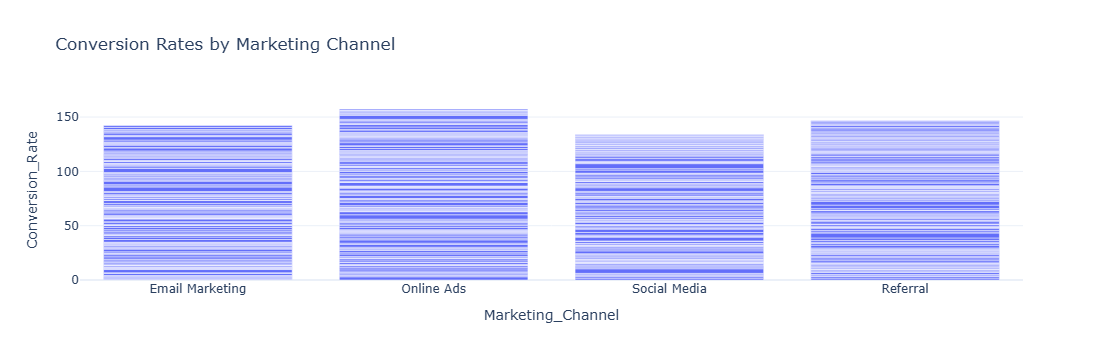

In [13]:
# Conversion Rates by Marketing Channel
fig = px.bar(data, x='Marketing_Channel', 
             y='Conversion_Rate', 
             title='Conversion Rates by Marketing Channel')
fig.show()

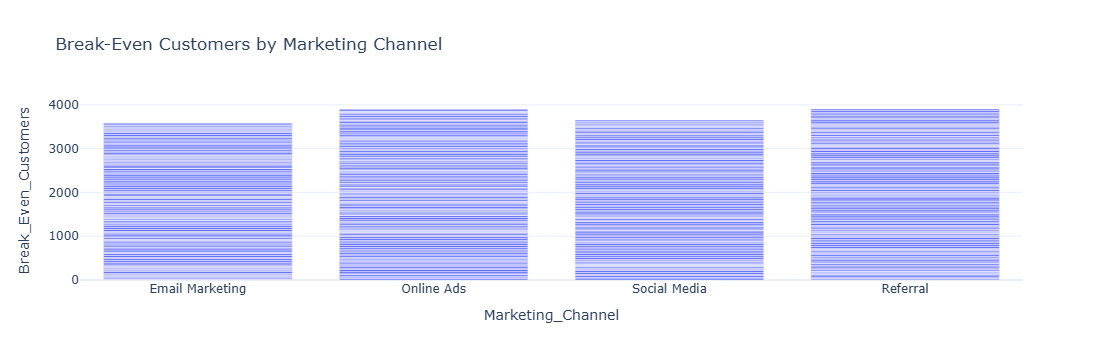

In [14]:
data['Break_Even_Customers'] = data['Marketing_Spend'] / data['CAC']

fig = px.bar(data, x='Marketing_Channel', 
             y='Break_Even_Customers', 
             title='Break-Even Customers by Marketing Channel')
fig.show()

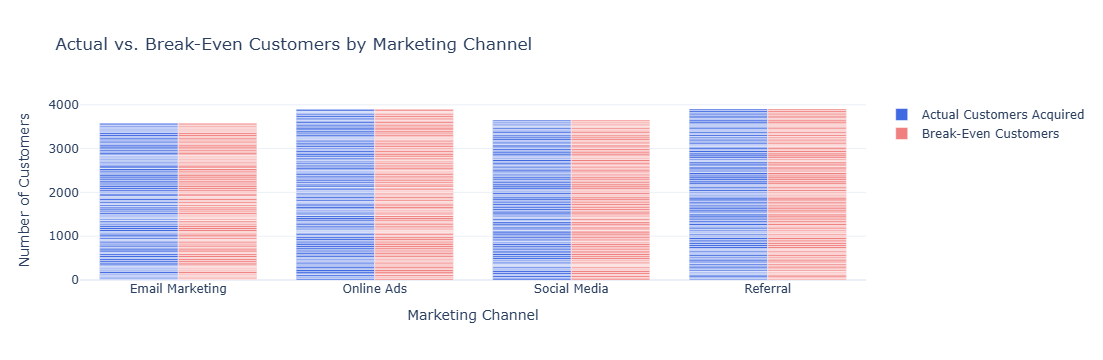

In [15]:
fig = go.Figure()

# Actual Customers Acquired
fig.add_trace(go.Bar(x=data['Marketing_Channel'], y=data['New_Customers'],
                     name='Actual Customers Acquired', marker_color='royalblue'))

# Break-Even Customers
fig.add_trace(go.Bar(x=data['Marketing_Channel'], y=data['Break_Even_Customers'],
                     name='Break-Even Customers', marker_color='lightcoral'))

# Update the layout
fig.update_layout(barmode='group', title='Actual vs. Break-Even Customers by Marketing Channel',
                  xaxis_title='Marketing Channel', yaxis_title='Number of Customers')

# Show the chart
fig.show()

In [ ]:
###So, this shows a positive result of the marketing campaign as the actual customers acquired from all marketing channels exactly match the break-even customers. If the actual customers acquired were short of the break-even point, it would have indicated a need to reassess marketing strategies or allocate additional resources to those channels.